In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
from sklearn.feature_extraction.text import CountVectorizer
import config

In [2]:
def timestamp_datetime(value):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(value))

def time_feat(df,featList,featName):
    scaler = StandardScaler()
    tmp = df.groupby(featList).size().reset_index().rename(columns={0:featName})
    tmp[featName] = scaler.fit_transform(tmp[featName].values.reshape(-1,1))
    df = df.merge(tmp,'left',on=featList)
    return df

def process(df):
    df['time'] = df.context_timestamp.apply(timestamp_datetime)
    df['day'] = df.time.apply(lambda x: int(x[8:10]))
    df['hour'] = df.time.apply(lambda x: int(x[11:13]))
    df['item_property_list_clean'] = df['item_property_list'].apply(lambda x:';'.join(sorted(set(str(x).split(';')))))
    df["missing_feat"] = np.sum((df == -1).values, axis=1)
    return df

In [3]:
trainFile = 'round1_ijcai_18_train_20180301.txt'
testFile = 'round1_ijcai_18_test_a_20180301.txt'
dataDir = '../../Data/advertisment/Raw/'

In [4]:
dfTrain = pd.read_table(dataDir+trainFile,sep=' ')
dfTrain.drop_duplicates(inplace=True)
#dfTest = pd.read_table(dataDir+testFile,sep=' ')

dfTrain = process(dfTrain)
#dfTest = process(dfTest)

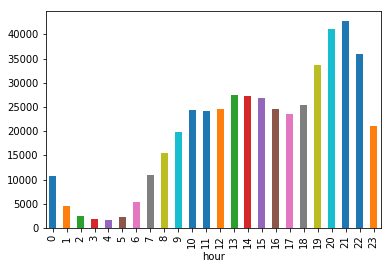

In [29]:
dfTrain.groupby('hour')['is_trade'].count().sort_index().plot(kind='bar')

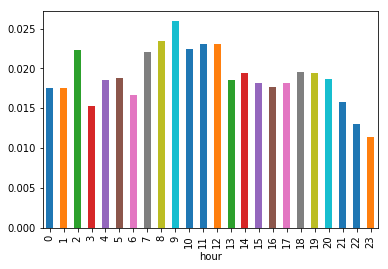

In [30]:
dfTrain.groupby('hour')['is_trade'].mean().sort_index().plot(kind='bar')

In [5]:
dfTrain.columns

Index(['instance_id', 'item_id', 'item_category_list', 'item_property_list',
       'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level',
       'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id',
       'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id',
       'context_timestamp', 'context_page_id', 'predict_category_property',
       'shop_id', 'shop_review_num_level', 'shop_review_positive_rate',
       'shop_star_level', 'shop_score_service', 'shop_score_delivery',
       'shop_score_description', 'is_trade', 'time', 'day', 'hour',
       'item_property_list_clean', 'missing_feat'],
      dtype='object')

In [15]:
for var in dfTrain:
    if var not in config.KEYS+['context_timestamp']+config.NUMERIC_COLS:
        print(var,dfTrain[var].nunique())
        if dfTrain[var].nunique()>200:
            continue
        print(sorted(dfTrain[var].unique().tolist()))

item_category_list 14
['7908382889764677758;1968056100269760729', '7908382889764677758;2011981573061447208', '7908382889764677758;22731265849056483', '7908382889764677758;2436715285093487584', '7908382889764677758;2642175453151805566;6233669177166538628', '7908382889764677758;2642175453151805566;8868887661186419229', '7908382889764677758;3203673979138763595', '7908382889764677758;4879721024980945592', '7908382889764677758;509660095530134768', '7908382889764677758;5755694407684602296', '7908382889764677758;5799347067982556520', '7908382889764677758;7258015885215914736', '7908382889764677758;8277336076276184272', '7908382889764677758;8710739180200009128']
item_property_list 10908
item_brand_id 2055
item_city_id 128
[-1, 196257267849351217, 209109918333456044, 266534138255813526, 333440506879701736, 445518607167094136, 470140807240234049, 481482873950391103, 514694032262818403, 548352491538518780, 739849083029856578, 977185943282967113, 982582487743860343, 983006732149699580, 101905547850

['instance_id', 'user_id', 'context_id', 'is_trade', 'shop_id', 'item_id']

In [ ]:
tmp = dfTrain.loc[dfTrain.duplicated(['user_id','item_id'],False)]
#.sort_values(['user_id','item_id','context_timestamp'])['is_trade'].mean()

tmp['Rank'] = tmp.groupby(['user_id','item_id'])['context_timestamp'].rank()


In [ ]:
dfTrain['user_cnt'] = dfTrain.groupby(['user_id'], as_index=False)['instance_id'].agg({'user_cnt': 'count'})['user_cnt']
for col in ['user_gender_id']:
    itemcnt = dfTrain.groupby([col, 'user_id'], as_index=False)['instance_id'].agg({str(col) + '_user_cnt': 'count'})

In [ ]:
tmp = dfTrain.drop_duplicates(['user_id','user_gender_id'])
user_list = tmp['user_id'].value_counts()[tmp['user_id'].value_counts()>1].index

In [ ]:
dfTrain.loc[dfTrain['user_id'].isin(user_list),'is_trade'].count()

In [ ]:
itemcnt

In [ ]:
tmp.groupby('Rank')['is_trade'].mean()

In [ ]:
dfTrain.loc[dfTrain.duplicated(['user_id','item_id'],False)].sort_values(['user_id','item_id','context_timestamp'])[config.KEYS+['context_timestamp']]

In [ ]:
print(dfTest.user_id.nunique()*1.0/dfTest.shape[0])
print(dfTrain.user_id.nunique()*1.0/dfTrain.shape[0])

In [ ]:
1/(dfTest.user_id.nunique()*1.0/dfTest.shape[0])

In [ ]:
1/(dfTrain.user_id.nunique()*1.0/dfTrain.shape[0])

In [ ]:
dfTest.item_category_list

In [ ]:
dfTest.user_id.value_counts().describe()

In [ ]:
a = -0.31284*18371/(-0.31284-18.10784)
print(a)
312/18371

In [ ]:
-0.31284*18371

In [ ]:
import sys
np.log(sys.float_info.epsilon)

In [ ]:
dfTest.user_id.value_counts().reset_index()

In [ ]:
for i in dfTrain.day.unique():
    print(i)
    print('\n')
    tmp = dfTrain.loc[dfTrain.day==i]
    #tmp = tmp.merge(tmp.user_id.value_counts().reset_index(),'inner',left_on='user_id',right_on='index')
    tmp['rank'] = tmp.groupby('user_id')['context_timestamp'].rank(method='first')
    print(pd.concat([tmp.groupby('rank')['is_trade'].mean(),tmp.groupby('rank')['is_trade'].count()],axis=1))
    

In [ ]:
tmp.groupby('rank')['is_trade'].count().plot()

In [ ]:
tmp.groupby('rank')['is_trade'].mean().plot()

In [ ]:
import config
dfTrain.loc[dfTrain['rank']==4.5].sort_values('user_id')[config.KEYS]

In [ ]:
dfTrain.drop_duplicates(['context_id','context_timestamp']).shape

In [ ]:
dfTrain.context_timestamp.nunique()

In [ ]:
count = CountVectorizer(ngram_range=(1,1))
tt =count.fit_transform(dfTrain['item_property_list'].apply(lambda x: x.replace(';',' ')))

In [ ]:
dfTrain['item_property_list'].apply(lambda x:';'.join(sorted(set(x.split(';'))))).value_counts()

In [ ]:
def string_process(df):
    

In [ ]:
grouped = dfTrain.groupby(['context_page_id'])

grouped['is_trade'].agg('mean').sort_index(ascending=True)

In [ ]:
dfTrain.loc[dfTrain['user_id']==5730330586479721983]

In [ ]:
tt.data.max()

In [ ]:
dfTrain.dtypes

In [ ]:
dfTrain.head(5)

In [ ]:
dfTrain['predict_category_property_bin'] = dfTrain['predict_category_property'].apply(lambda x: x.count(';'))
dfTrain['predict_category_property_bin'].describe()

In [ ]:
dfTrain.loc[dfTrain['predict_category_property_bin']==0,'predict_category_property']

In [ ]:
for i in range(3):
    print(dfTrain['item_category_list_bin_%d'%i].unique())

In [ ]:
tt = np.array(';'.join(dfTrain['item_property_list'].tolist()).split(';'))

In [ ]:
np.unique(tt).shape

In [ ]:
dfTrain['shop_id'].value_counts()[dfTrain['shop_id'].value_counts()>1].index

In [ ]:
dfTrain.loc[dfTrain['user_id']==7201324926905945581,'is_trade']

In [ ]:
def timestamp_datetime(value):
    format = '%Y-%m-%d %H:%M:%S'
    value = time.localtime(value)
    dt = time.strftime(format, value)
    return dt

dfTrain['context_timestamp_date'] = dfTrain['context_timestamp'].map(timestamp_datetime).apply(lambda x: x[:10])
dfTest['context_timestamp_date'] = dfTest['context_timestamp'].map(timestamp_datetime).apply(lambda x: x[:10])

In [ ]:
dfTrain['context_timestamp_date'].value_counts()

In [ ]:
dfTrain.groupby(['context_timestamp_date'])['is_trade'].mean()

In [ ]:
print(dfTrain['context_timestamp_date'].max())
print(dfTrain['context_timestamp_date'].min())
print(dfTest['context_timestamp_date'].max())
print(dfTest['context_timestamp_date'].min())

In [ ]:
dfTest.shape

In [ ]:
for i in dfTrain['predict_category_property'].tolist()[:10]:
    tmpDict ={}
    for j in i.split(';'):
        m,n = j.split(':')
        tmpDict[m] = n.split(',')

In [ ]:
def dictgen(i):
    tmpDict ={}
    for j in i.split(';'):
        try:
            m,n = j.split(':')
            '''if not '-1' in n.split(','):
                tmpDict[m] = len(n.split(','))'''
            tmpDict[m] = len(n.split(',')) if not '-1' in n.split(',') else -1
        except: 
                tmpDict ={'-1':'-1'}
    return tmpDict

In [ ]:
dfTrain['predict_category_property_dict'] = dfTrain['predict_category_property'].map(dictgen)

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=True)
X = v.fit_transform(dfTrain['predict_category_property_dict'].tolist())
X.shape

In [ ]:
dfTrain['predict_category_property_dict'].tolist()[0:10]

In [ ]:
idTrain = set(dfTrain.user_id.unique().tolist())
idTest = set(dfTest.user_id.unique().tolist())

In [ ]:
print(len(idTrain))
print(len(idTest))
print(len(idTrain&idTest))


In [ ]:
dfTrain.shape

In [ ]:
dfTest.shape

In [ ]:
np.log(0.95)

In [ ]:
1.5/180000